## Spatial Patterns

This code takes the data from the corresponding .csv file and extracts the data from the rows & columns. A voltage over time graph is made and combines all buses in one plot. The most extreme bus(es) are highlighted to analyze the behaviour and reasons for the extremities.

Lowest voltage bus: 17
Highest voltage bus: 17


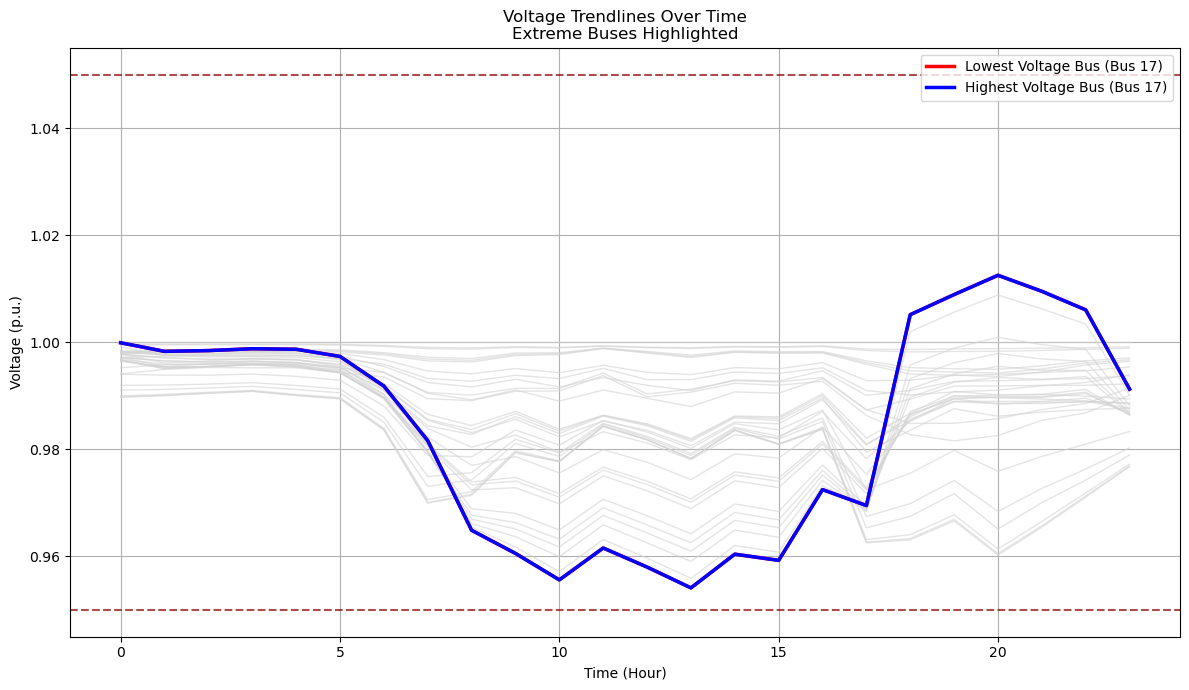

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd

# Load the data file when the git repo is downloaded. This should work on any computer
try:
    here = Path(__file__).resolve().parent
except NameError:
    here = Path.cwd().resolve()

# Read the excel data file
data_path = (here.parent / "data" / "spatial_patterns2.csv").resolve()
df = pd.read_csv(data_path)

# Sort rows and columns
df.set_index("Bus", inplace=True)
df.columns = df.columns.astype(int)

# Identify the bus with lowest minimum voltage
min_bus = df.min(axis=1).idxmin()

# Identify the bus with highest maximum voltage
max_bus = df.max(axis=1).idxmax()
# Note: If one bus contians both the minimum and the maximum voltage,
# The minimum will be analyzed as it is usually closer to the 
# lower limit than the maximum is to the higher limit, hence this specific order of identification

# Print the maximum and minimum voltage bus
print(f"Lowest voltage bus: {min_bus}")
print(f"Highest voltage bus: {max_bus}")

# Plot the results
plt.figure(figsize=(12, 7))

# Plot all buses in light gray
for bus in df.index:
    plt.plot(
        df.columns,
        df.loc[bus],
        color="lightgray",
        linewidth=1,
        alpha=0.6
    )

# Highlight the lowest voltage bus
plt.plot(
    df.columns,
    df.loc[min_bus],
    color="red",
    linewidth=2.5,
    label=f"Lowest Voltage Bus (Bus {min_bus})"
)

# Highlight the highest voltage bus
plt.plot(
    df.columns,
    df.loc[max_bus],
    color="blue",
    linewidth=2.5,
    label=f"Highest Voltage Bus (Bus {max_bus})"
)

# Set voltage limits
plt.axhline(0.95, linestyle="--", color="darkred", alpha=0.7)
plt.axhline(1.05, linestyle="--", color="darkred", alpha=0.7)

# Plot labels and settings
plt.xlabel("Time (Hour)")
plt.ylabel("Voltage (p.u.)")
plt.title("Voltage Trendlines Over Time\nExtreme Buses Highlighted")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()